In [1]:
# importing libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# importing dataset

df = pd.read_csv('new_york_data.csv', index_col = 0)

In [5]:
# checking column names

df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value'],
      dtype='object')

In [37]:
df = df.drop("_merge", axis=1)

### Step 3

In [38]:
# setting theme

sns.set_theme(style = "dark", palette = "Blues_r")

### Step 4

In [39]:
df['value'] = 1

In [40]:
# grouping rides by their starting station

df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [41]:
df_t

,start_station_name,value
0,11 St & Washington St,15502
1,12 St & Sinatra Dr N,17137
2,14 St Ferry - 14 St & Shipyard Ln,17066
3,4 St & Grand St,10356
4,5 Corners Library,3043
...,...,...
79,Van Vorst Park,10744
80,Warren St,13575
81,Washington St,15101
82,Willow Ave & 12 St,9459


In [42]:
# putting the top 20 starting stations into a dataframe

top20 = df_t.nlargest(20, 'value')

In [43]:
top20

,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


C:\Users\Layzr\AppData\Local\Temp\ipykernel_13800\801752102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


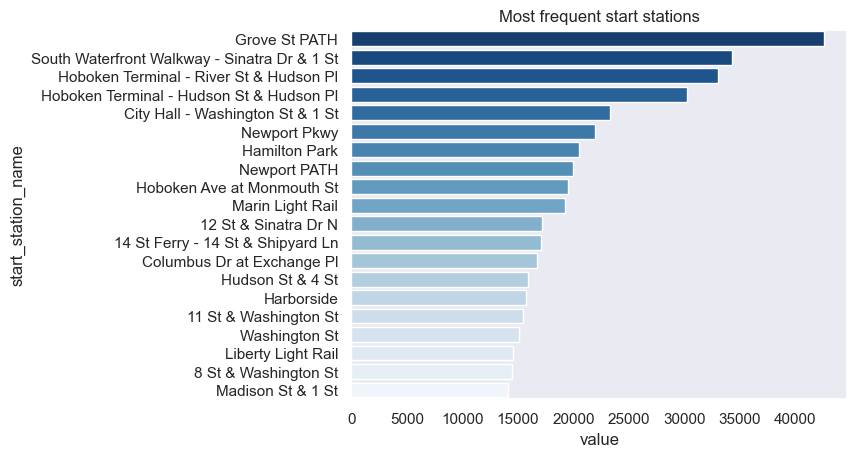

In [44]:
# plotting top 20 starting stations

sns.barplot(
data=top20, x='value', y='start_station_name', palette = "Blues_r")
plt.title("Most frequent start stations")
plt.show()

### Step 5

In [45]:
# making sure date column is in date format

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [46]:
# Grouping the count of trips

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [47]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [48]:
# merging the daily rides column into the main dataframe

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 18)
Shape of January 2nd is (0, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'bike_rides_daily', '_merge'],
      dtype='object')


In [49]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,11.6,1,592,both
2022-01-01,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6,1,592,both
2022-01-01,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6,1,592,both
2022-01-01,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,11.6,1,592,both
2022-01-01,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,11.6,1,592,both


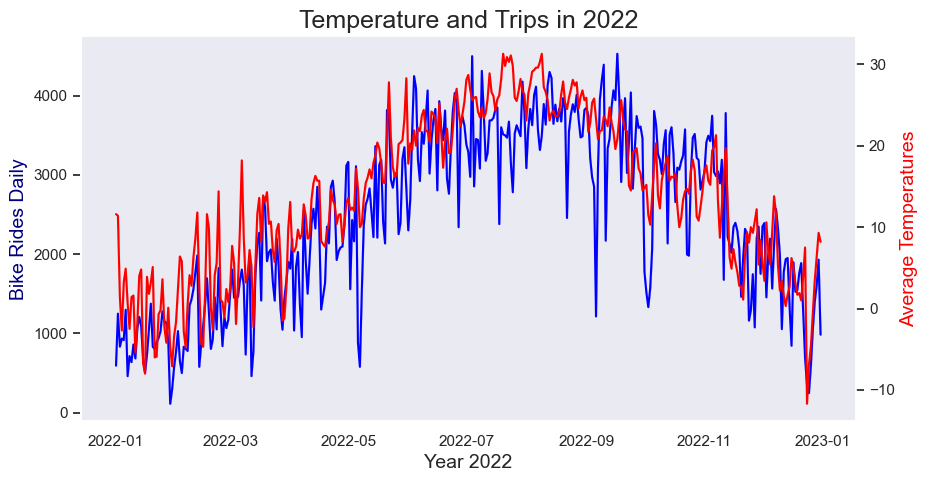

In [56]:
# plotting temperature and trips

fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14)
ax.set_ylabel("Bike Rides Daily",color = "navy", fontsize = 14)

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

### Step 6

In [58]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,bike_rides_daily,_merge
0,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,2022-01-01,11.6,1,592,both
1,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,1,592,both
2,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,1,592,both
3,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,2022-01-01,11.6,1,592,both
4,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,2022-01-01,11.6,1,592,both


In [61]:
# Making sure started_at and ended_at are datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Creating trip_duration and converting to minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [62]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,bike_rides_daily,_merge,trip_duration
0,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,2022-01-01,11.6,1,592,both,9.150000
1,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,1,592,both,3.700000
2,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,1,592,both,3.733333
3,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,2022-01-01,11.6,1,592,both,14.000000
4,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,2022-01-01,11.6,1,592,both,19.200000


In [70]:
# checking for negative trip durations

df[df['trip_duration'] < 0][['ride_id', 'started_at', 'ended_at', 'trip_duration']]

,ride_id,started_at,ended_at,trip_duration
194921,5409FA7BA57DE843,2022-05-11 17:45:30,2022-05-11 17:45:29,-0.016667
474262,1280E98812DAEF6C,2022-08-03 18:16:02,2022-08-03 18:15:58,-0.066667
486459,4573C15DF4013196,2022-08-06 19:03:46,2022-08-06 19:03:45,-0.016667
738846,8790B38B7302EAB4,2022-10-20 09:55:14,2022-10-20 09:55:05,-0.150000
791425,A25FA63EE1ECE20D,2022-11-06 01:33:16,2022-11-06 01:26:21,-6.916667
791427,059B88375530605D,2022-11-06 01:34:06,2022-11-06 01:13:30,-20.600000
791428,71BFFF68358BDE94,2022-11-06 01:34:40,2022-11-06 01:13:16,-21.400000
791440,334DB08435E84190,2022-11-06 01:41:50,2022-11-06 01:04:59,-36.850000
791449,1284E19E61D4D2D2,2022-11-06 01:55:35,2022-11-06 01:00:04,-55.516667
791450,DC8F1EC37769460C,2022-11-06 01:57:12,2022-11-06 01:12:19,-44.883333


In [71]:
# getting rid of negative trip durations

df = df[df['trip_duration'] >= 0]

In [86]:
# keeping only rides under 3 hours

df_filtered = df[df['trip_duration'] < 240]

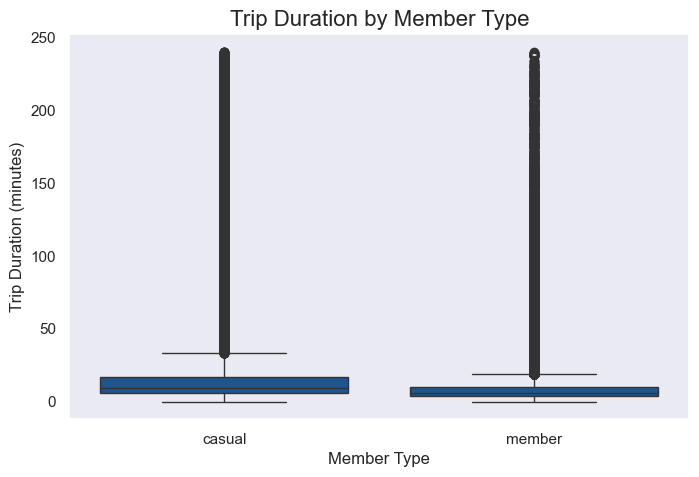

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='member_casual', y='trip_duration')

plt.title("Trip Duration by Member Type", fontsize=16)
plt.xlabel("Member Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()

### This graph tells us that casual riders on average take longer trips than members, this is probably because if you are a member you are probably using the bikes often for less time whereas a casual person is probably only getting a bike for some special occasion and is making it worth their time. This also tells us that a lot of people take very long bike trips (I created this graph with rides that were < 24 hours and it was unreadable). This could be because they forget to dock the bikes for hours/days on end which I would suspect is the case for a lot of these.

### Step 7

In [88]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'value', 'bike_rides_daily',
       '_merge', 'trip_duration'],
      dtype='object')

In [95]:
# Create ordered month categories
month_order = ["January","February","March","April","May","June", "July","August","September","October","November","December"]

df['month'] = pd.Categorical(df['started_at'].dt.month_name(), categories=month_order, ordered=True)

C:\Users\Layzr\AppData\Local\Temp\ipykernel_13800\177663966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.Categorical(df['started_at'].dt.month_name(), categories=month_order, ordered=True)


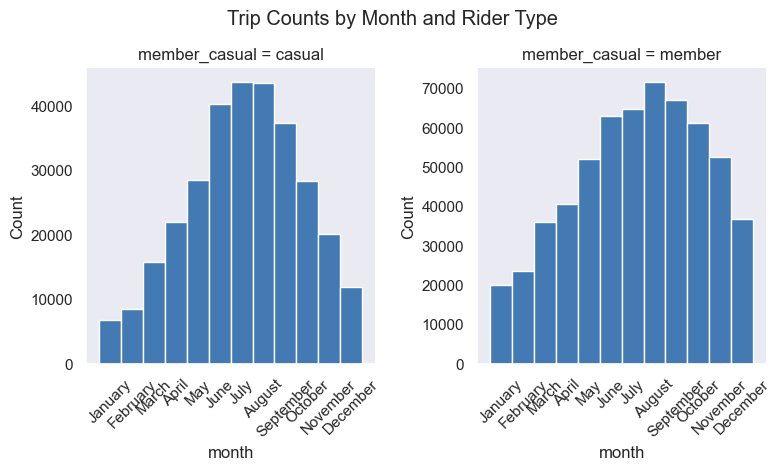

In [101]:
# FacetGrid
g = sns.FacetGrid(df, col="member_casual", col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.histplot, x="month", discrete=True)

g.set_xticklabels(rotation=45)
g.fig.suptitle("Trip Counts by Month and Rider Type", y=1.05)
plt.show()

### This shows us that the summer months are the most popular months for both types of customers.
### The biggest thing I notice is that there is a major difference in the months following summer and fall mainly November and December stay decently high for members while plummeting for casual users.